In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# from sklearn.preprocessing import StandardScaler

In [2]:
# Carrega o conjunto de dados a partir de um arquivo CSV chamado 'breast_cancer.csv'
# O delimitador é uma vírgula
data = pd.read_csv('breast_cancer.csv', delimiter=',')

# Substitui os valores da coluna 'Class': 2 por 0 (Benigno) e 4 por 1 (Malicioso)
data['Class'] = data['Class'].replace({2: 0, 4: 1})

# Extrai as características (features) do conjunto de dados, excluindo a primeira coluna (índice 0) e a última coluna (rótulos)
X = data.iloc[:, 1:-1].values

# Extrai os rótulos (target) do conjunto de dados, pegando apenas a última coluna
y = data.iloc[:, -1].values

# Imprime os rótulos para verificar os dados extraídos
print(y)

# Imprime as características para verificar os dados extraídos
print(X)

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

In [3]:
# Padronização dos dados não é necessário, valores das colunas segue um padrão
# sc = StandardScaler()
# X = sc.fit_transform(X)
# print(X)

In [4]:
# Divide os dados em conjuntos de treino e teste
# 'X' contém as características e 'y' contém os rótulos
# test_size=0.2 indica que 20% dos dados serão usados para o conjunto de teste
# random_state=0 garante que a divisão dos dados seja reproduzível
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Cria um modelo de Regressão Logística com um estado aleatório fixo para garantir a reprodutibilidade
classifier = LogisticRegression(random_state=0)

# Treina o modelo usando os dados de treinamento (X_train e y_train)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [6]:
# Faz previsões usando o modelo treinado para o conjunto de teste (X_test)
y_pred = classifier.predict(X_test)

# Cria uma matriz de confusão comparando os rótulos verdadeiros (y_test) com as previsões (y_pred)
cm = confusion_matrix(y_test, y_pred)  # Organiza as informações em formato de matriz

# Calcula a acurácia do modelo, comparando os rótulos verdadeiros com as previsões
ac = accuracy_score(y_test, y_pred)  # Calcular acurácia

# Imprime a matriz de confusão
print(cm)

[[84  3]
 [ 3 47]]


In [7]:
# Realiza a validação cruzada com 10 dobras, usando o classificador especificado
# 'X_train' são os dados de entrada e 'y_train' são as classes correspondentes
scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)  # cv = número de dobras

# Calcula e imprime a acurácia média dos testes em porcentagem
print(f"Acurácia 10 testes: {scores.mean()*100:.2f}%")

# Calcula e imprime o desvio padrão dos scores em porcentagem
print(f"Desvio padrão 10 testes: {scores.std()*100:.2f}%")

Acurácia 10 testes: 96.70%
Desvio padrão 10 testes: 1.97%


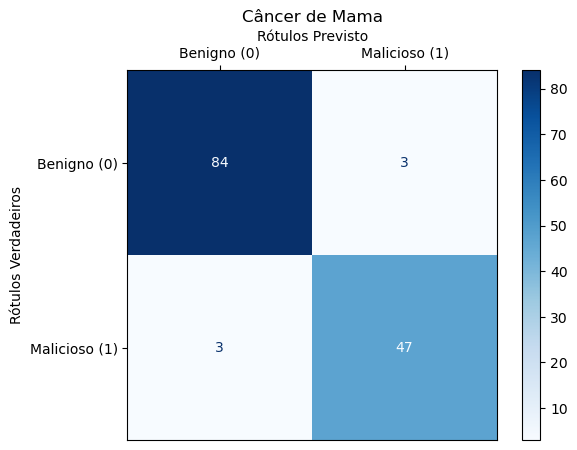

Acurácia: 95.62%


In [21]:
# Define os rótulos que serão exibidos na matriz de confusão
labels = ['Benigno (0)', 'Malicioso (1)']

# Cria um objeto de exibição da matriz de confusão usando a matriz 'cm' e os rótulos especificados
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)  # Substitui 0 e 1 pelos rótulos definidos

# Cria uma nova figura e eixo para o gráfico da matriz de confusão
fig, ax = plt.subplots()

# Plota a matriz de confusão com a coloração azul
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Move os rótulos do eixo x para a parte superior do gráfico
ax.xaxis.set_ticks_position('top')  # Coloca os rótulos do eixo x na parte superior
ax.xaxis.set_label_position('top')  # Coloca o rótulo do eixo x na parte superior

# Rotaciona os rótulos do eixo x, se necessário, para melhor legibilidade
plt.xticks(rotation=0)  # Rotaciona os rótulos se necessário

# Define o título e os rótulos dos eixos
plt.title("Câncer de Mama")  # Título do gráfico
plt.xlabel("Rótulos Previsto")  # Rótulo do eixo X em português
plt.ylabel("Rótulos Verdadeiros")  # Rótulo do eixo Y em português

# Exibe o gráfico da matriz de confusão
plt.show()

# Imprime a acurácia do modelo em formato percentual
print(f"Acurácia: {ac:.2%}")

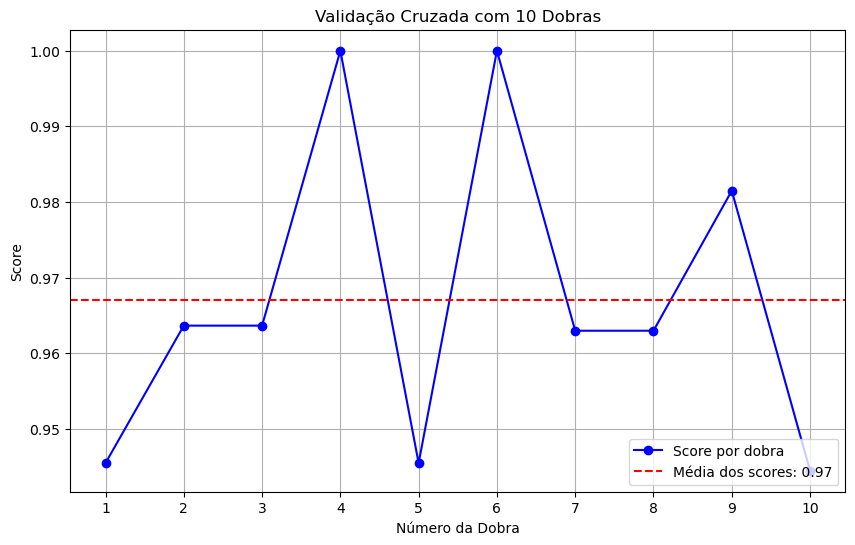

In [9]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(10, 6))

# Plota os scores para cada dobra, com marcadores e linha conectando os pontos
plt.plot(range(1, 11), scores, marker='o', linestyle='-', color='b', label='Score por dobra')

# Adiciona uma linha horizontal que representa a média dos scores
plt.axhline(y=scores.mean(), color='r', linestyle='--', label=f'Média dos scores: {scores.mean():.2f}')

# Adiciona detalhes ao gráfico
plt.title('Validação Cruzada com 10 Dobras')  # Título do gráfico
plt.xlabel('Número da Dobra')  # Rótulo do eixo X
plt.ylabel('Score')  # Rótulo do eixo Y
plt.xticks(range(1, 11))  # Define os ticks do eixo X de 1 a 10
plt.legend(loc='lower right')  # Adiciona a legenda no canto inferior direito
plt.grid(True)  # Ativa a grade no gráfico

# Exibe o gráfico
plt.show()